In [1]:
#Importing All Packages
import matplotlib.pyplot as plt
import numpy as np
import csv
import scipy.optimize
from scipy.integrate import odeint
import pandas as pd

In [2]:
#Initializing yeras, hare population and lynx population columns with empty lists
years = []
hare_pop = []
lynx_pop = []
#Data of lynx and hare population from 1847 to 1903
data_file= "Leigh1968_harelynx.csv"
# reading data as dataframe to check what our data is
df=pd.read_csv(data_file)

In [3]:
df.head()

,year,hare,lynx
0,1847,21000,49000
1,1848,12000,21000
2,1849,24000,9000
3,1850,50000,7000
4,1851,80000,5000


In [4]:
## read data
with open(data_file) as file:

    reader = csv.reader(file, delimiter=',')

    # skip header
    next(reader)

    for row in reader:
        #appending the year column from data into years list
        years.append(float(row[0]))
        #appending the column which indicates hare population in list hare_pop
        hare_pop.append(float(row[1]))
        #appending the column which indicates layx population in list hare_pop
        lynx_pop.append(float(row[2]))

[1.00000021 0.99999982 0.99999996 1.00000002]


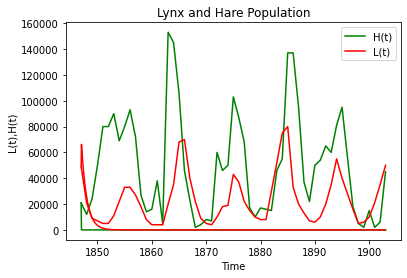

In [5]:
def sim(variables, t, params):

    # hare population level
    h = variables[0]

    # lynx population level
    l = variables[1]

    # Constant Parameters for differential equations
    a = params[0]
    b = params[1]
    d = params[2]
    c = params[3]
    #Our Final differential Equations
    dhdt = a * h - b * h * l
    dldt = d * h * l - c * l

    return([dhdt, dldt])


#Function to find Loss
def loss_function(params, years,hare_pop, lynx_pop):

    y0 = [hare_pop[0], lynx_pop[0]]

    t = np.linspace(years[0], years[-1], num=len(years))
    # Using odient function to find solution
    output = odeint(sim, y0, t, args=(params,))
    #Initializing loss as 0
    loss = 0
    
    for i in range(len(years)):\
        #Original Population of Hare
        data_hare = hare_pop[i]
        # Estimated population using Ordinary differential equations
        model_hare = output[i,0]
        #Original popultion of lynx
        data_lynx = lynx_pop[i]
        # Estimated population using Ordinary differential equations

        model_lynx = output[i,1]
        # finding the squared error in population of both species and summing
        res = (data_hare - model_hare)**2 + (data_lynx- model_lynx)**2
        # Adding the res value the loss value
        loss += res

    return(loss)


#All Parameters initialized as 1
params0 = np.array([1,1,1,1])
# Finding the minimum value to fit the curve
minimum = scipy.optimize.fmin(loss_function, params0, args=(years,hare_pop, lynx_pop))

print(minimum)
#our new parameters
a_fit= minimum[0]
b_fit = minimum[1]
d_fit = minimum[2]
c_fit = minimum[3]

params = [a_fit, b_fit, d_fit, c_fit]

y0 = [hare_pop[0], lynx_pop[0]]

t = np.linspace(years[0], years[-1], num=1000)
#Finding the solution for new parameters
output = odeint(sim, y0, t, args=(params,))

#f,(ax1,ax2) = plt.subplots(2)
#Plotting the Population Graphs
line1 = plt.plot(years,hare_pop, c="g",label='H(t)')
line2 = plt.plot(years,lynx_pop, c="r",label='L(t)')
#Plotting the Output Function to fit the population graphs
line1, = plt.plot(t,output[:,0], color="g")
line2, = plt.plot(t,output[:,1], color="r")
plt.xlabel("Time")
plt.ylabel("L(t),H(t)")
plt.title("Lynx and Hare Population")
plt.legend() 
# To load the display window
plt.show()